# Read Dataset --KNN

In [296]:
import pandas as pd
df1=pd.read_csv('KNN_impute.csv')
df1_vali=pd.read_csv('KNN_impute_validation.csv')
df1_test=pd.read_csv('KNN_impute_test.csv')

# MLP-- upsampling KNN

In [122]:

def upsample(data):
    from sklearn.utils import resample
    
    df_majority=data[data.Default_ind==0]
    df_minority=data[data.Default_ind==1]
    largenumber=len(df_majority)
    df_minority_upsampled=resample(df_minority,replace=True,n_samples=int(1.2*largenumber),random_state=123)
    df_upsampled=pd.concat([pd.DataFrame(df_majority),pd.DataFrame(df_minority_upsampled)])
    return df_upsampled

In [123]:
df1_up= upsample(df1)
df1_vali_up=upsample(df1_vali)

In [124]:
def Cate_to_object_excp_inq(dataset):
    return(dataset.astype({'non_mtg_acc_past_due_12_months_num': 'object','non_mtg_acc_past_due_6_months_num': 'object','mortgages_past_due_6_months_num': 'object','card_inq_24_month_num': 'float64','inq_12_month_num': 'float64','card_open_36_month_num': 'object','auto_open_36_month_num': 'object','ind_acc_XYZ': 'object'}))

In [125]:
df1_up=Cate_to_object_excp_inq(df1_up)
df1_vali=Cate_to_object_excp_inq(df1_vali)

In [126]:
def para_tune(datatrain, datavali, criteria='accuracy', randomstate=0):
    ## X is the validation set variables
    ## Y is the validation set response
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    parameter_space = {
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['lbfgs', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive'],
    }
    from sklearn.model_selection import GridSearchCV
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier(max_iter=1000)
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=pds,scoring=criteria)
    clf.fit(datatrainX, datatrainy)
    return clf,datatrainX,datatrainy

In [127]:
clf1,x1,y1=para_tune(df1_up,df1_vali_up)

In [290]:
clf1.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [293]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(50,100,50),learning_rate='adaptive',
                        solver='adam',max_iter=1000)

In [294]:
mlp.fit(x1,y1)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive', max_iter=1000)

In [298]:
df1_test1=Cate_to_object_excp_inq(df1_test)
df1_test1=pd.get_dummies(df1_test1)
mlp.score(df1_test1.drop('Default_ind',axis=1),df1_test1['Default_ind'])

0.4306

In [299]:
y_pred1=mlp.predict(df1_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix( df1_test1['Default_ind'],y_pred1)


array([[1801, 2798],
       [  49,  352]])

# Read Dataset --Unconditional median

In [207]:
import pandas as pd
df2=pd.read_csv('Unconditional_median_impute.csv')
df2_vali=pd.read_csv('Unconditional_median_impute_validation.csv')
df2_test=pd.read_csv('Unconditional_median_impute_test.csv')

# MLP-- Unconditional median

In [208]:
df2_up= upsample(df2)
df2_vali_up=upsample(df2_vali)

In [209]:
df2_up=Cate_to_object_excp_inq(df2_up)
df2_vali=Cate_to_object_excp_inq(df2_vali_up)

In [210]:
clf2,x2,y2=para_tune(df2_up,df2_vali_up)

In [300]:
clf2.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [212]:
df2_test1=Cate_to_object_excp_inq(df2_test)
df2_test1=pd.get_dummies(df2_test1)
clf2.score(df2_test1.drop('Default_ind',axis=1),df2_test1['Default_ind'])

0.0802

In [302]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(activation='relu',alpha=0.05,hidden_layer_sizes=(50,50,50),learning_rate='constant',
                        solver='adam',max_iter=1000)
mlp1.fit(x2,y2)
mlp1.score(df2_test1.drop('Default_ind',axis=1),df2_test1['Default_ind'])

0.9196

In [303]:
y_pred2=mlp1.predict(df2_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix( df2_test1['Default_ind'],y_pred2)


array([[4423,  176],
       [ 226,  175]])

# Read Dataset -- drop

In [144]:
import pandas as pd
df3=pd.read_csv('Listwise_deletion.csv')
df3_vali=pd.read_csv('Listwise_deletion_validation.csv')
df3_test=pd.read_csv('Listwise_deletion_test.csv')

# MLP -- drop

In [145]:
df3_up= upsample(df3)
df3_vali_up=upsample(df3_vali)

In [146]:
df3_up=Cate_to_object_excp_inq(df3_up)
df3_vali=Cate_to_object_excp_inq(df3_vali)

In [147]:
clf3,x3,y3=para_tune(df3_up,df3_vali_up)

In [149]:
df3_test1=Cate_to_object_excp_inq(df3_test)
df3_test1=pd.get_dummies(df3_test1)
clf3.score(df3_test1.drop('Default_ind',axis=1),df3_test1['Default_ind'])

0.9337509033967719

In [305]:
clf3.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [306]:
from sklearn.neural_network import MLPClassifier
mlp2 = MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(50,50,50),learning_rate='constant',
                        solver='adam',max_iter=1000)
mlp2.fit(x3,y3)
mlp2.score(df3_test1.drop('Default_ind',axis=1),df3_test1['Default_ind'])

0.9296555046976632

In [307]:
y_pred3=mlp2.predict(df3_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df3_test1['Default_ind'],y_pred3)

array([[3782,   28],
       [ 264,   77]])

# Read Dataset -- EM

In [338]:
import pandas as pd
df4=pd.read_csv('Simulated_Data_Train_em.csv')
df4_vali=pd.read_csv('Simulated_Data_validatiion_em.csv')
df4_test=pd.read_csv('Simulated_Data_test_em.csv')


In [339]:
pd.get_dummies(pd.concat([df4, df4_vali]))

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,rep_income,Default_ind,ind_acc_XYZ,States_AL,States_FL,States_GA,States_LA,States_MS,States_NC,States_SC
0,80826.71,15872.99,300,114,292,0,0,0,0.00,3,...,69000.00000,0,0.0,1,0,0,0,0,0,0
1,96052.60,12178.02,281,102,232,0,0,0,0.00,2,...,61000.00000,0,0.0,0,1,0,0,0,0,0
2,75212.76,12052.24,261,149,260,0,0,0,0.00,1,...,63670.85451,0,0.0,1,0,0,0,0,0,0
3,70727.84,8416.80,227,93,223,2,1,1,11013.96,0,...,79000.00000,1,0.0,0,0,0,0,0,0,1
4,41604.47,10611.97,249,136,241,0,0,0,0.00,0,...,70557.92467,0,1.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,104765.01,13905.40,182,84,165,0,0,0,0.00,4,...,62976.55898,0,NaN,0,0,0,0,0,0,0
19996,83990.07,10325.02,320,129,280,0,0,0,0.00,0,...,87000.00000,0,NaN,0,0,0,0,0,0,0
19997,107606.69,17838.79,290,168,271,1,0,0,0.00,3,...,63000.00000,0,NaN,0,0,0,0,0,0,0
19998,78787.72,11447.61,208,104,194,0,0,0,0.00,1,...,71000.00000,0,NaN,0,0,0,0,0,0,0


# MLP -- EM

In [340]:
df4_up= upsample(df4)
df4_vali_up=upsample(df4_vali)

In [341]:
df4_up=Cate_to_object_excp_inq(df4_up)
df4_vali_up=Cate_to_object_excp_inq(df4_vali_up)

In [342]:
df4_up.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,card_open_36_month_num,auto_open_36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,rep_income,Default_ind,States,ind_acc_XYZ
0,80826.71,15872.99,300,114,292,0,0,0,0.0,3.0,...,0,0,0.365902,0.475594,0.410504,0.520785,69000.00000,0,AL,0
1,96052.60,12178.02,281,102,232,0,0,0,0.0,2.0,...,1,0,0.542786,0.543158,0.535147,0.587351,61000.00000,0,FL,0
2,75212.76,12052.24,261,149,260,0,0,0,0.0,1.0,...,0,1,0.323678,0.321776,0.348713,0.413293,63670.85451,0,AL,0
4,41604.47,10611.97,249,136,241,0,0,0,0.0,0.0,...,0,0,0.644030,0.619987,0.546655,0.588442,70557.92467,0,LA,1
5,89198.22,15193.09,319,147,279,0,0,0,0.0,2.0,...,1,0,0.183918,0.309341,0.254744,0.193060,76000.00000,0,LA,0


In [343]:
clf4,x4,y4=para_tune(df4_up,df4_vali_up)

In [344]:
df4_test1=Cate_to_object_excp_inq(df4_test)
df4_test1=pd.get_dummies(df4_test1)

In [345]:
clf4.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [346]:
pd.DataFrame(x4).head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,80826.71,15872.99,300.0,114.0,292.0,0.0,3.0,4.0,0.365902,0.475594,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,96052.60,12178.02,281.0,102.0,232.0,0.0,2.0,4.0,0.542786,0.543158,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,75212.76,12052.24,261.0,149.0,260.0,0.0,1.0,3.0,0.323678,0.321776,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,41604.47,10611.97,249.0,136.0,241.0,0.0,0.0,2.0,0.644030,0.619987,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,89198.22,15193.09,319.0,147.0,279.0,0.0,2.0,3.0,0.183918,0.309341,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [347]:
from sklearn.neural_network import MLPClassifier
mlp3 = MLPClassifier(activation='tanh',alpha=0.0001,hidden_layer_sizes=(50,50,50),learning_rate='constant',
                        solver='adam',max_iter=1000)
mlp3.fit(x4,y4)
mlp3.score(df4_test1.drop('Default_ind',axis=1),df4_test1['Default_ind'])

0.731

In [348]:
y_pred4=mlp3.predict(df4_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df4_test1['Default_ind'],y_pred4)

array([[3490, 1109],
       [ 236,  165]])

# Read Dataset -- CART

In [351]:
import pandas as pd
df5=pd.read_csv('cart_impute.csv')
df5_vali=pd.read_csv('cart_impute_vali.csv')
df5_test=pd.read_csv('cart_impute_Test.csv')


# MLP--cart

In [384]:
df5_up= upsample(df5)
df5_vali_up=upsample(df5_vali)

In [385]:
df5_up=Cate_to_object_excp_inq(df5_up)
df5_vali=Cate_to_object_excp_inq(df5_vali)

In [386]:
clf5,x5,y5=para_tune(df5_up,df5_vali_up)

In [387]:
clf5.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [388]:
df5_test1=Cate_to_object_excp_inq(df5_test)
df5_test1=pd.get_dummies(df5_test1)

In [389]:
from sklearn.neural_network import MLPClassifier
mlp4 = MLPClassifier(activation='relu',alpha=0.0001,hidden_layer_sizes=(100,),learning_rate='adaptive',
                        solver='adam',max_iter=1000)
mlp4.fit(x5,y5)
mlp4.score(df5_test1.drop('Default_ind',axis=1),df5_test1['Default_ind'])

0.9322

In [390]:
y_pred5=mlp4.predict(df5_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df5_test1['Default_ind'],y_pred5)

array([[4530,   69],
       [ 270,  131]])

# Read data --RF 

In [158]:
import pandas as pd
df6=pd.read_csv('rf.csv')
df6_vali=pd.read_csv('rf_Vali.csv')
df6_test=pd.read_csv('rf_Test.csv')


# MLP--RF

In [159]:
df6_up= upsample(df6)
df6_vali_up=upsample(df6_vali)
df6_up=Cate_to_object_excp_inq(df6_up)
df6_vali=Cate_to_object_excp_inq(df6_vali)

In [160]:
clf6,x6,y6=para_tune(df6_up,df6_vali_up)

In [356]:
clf6.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [162]:
df6_test1=Cate_to_object_excp_inq(df6_test)
df6_test1=pd.get_dummies(df6_test1)
clf6.score(df6_test1.drop('Default_ind',axis=1),df6_test1['Default_ind'])

0.8786

In [357]:
from sklearn.neural_network import MLPClassifier
mlp5= MLPClassifier(activation='relu',alpha=0.0001,hidden_layer_sizes=(50,100,50),learning_rate='constant',
                        solver='adam',max_iter=1000)
mlp5.fit(x6,y6)
mlp5.score(df6_test1.drop('Default_ind',axis=1),df6_test1['Default_ind'])

0.577

In [358]:
y_pred6=mlp5.predict(df6_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df6_test1['Default_ind'],y_pred6)

array([[2564, 2035],
       [  80,  321]])

# Read data --EMB 

In [164]:
import pandas as pd
df7=pd.read_csv('EMB_impute.csv')
df7_vali=pd.read_csv('EMB_impute_Vali.csv')
df7_test=pd.read_csv('EMB_impute_Test.csv')



# MLP--EMB

In [165]:
df7_up= upsample(df7)
df7_vali_up=upsample(df7_vali)
df7_up=Cate_to_object_excp_inq(df7_up)
df7_vali=Cate_to_object_excp_inq(df7_vali)

In [166]:
clf7,x7,y7=para_tune(df7_up,df7_vali_up)

In [359]:
clf7.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [168]:
df7_test1=Cate_to_object_excp_inq(df7_test)
df7_test1=pd.get_dummies(df7_test1)
clf7.score(df7_test1.drop('Default_ind',axis=1),df7_test1['Default_ind'])

0.9336

In [360]:
from sklearn.neural_network import MLPClassifier
mlp6 = MLPClassifier(activation='relu',alpha=0.05,hidden_layer_sizes=(50,100,50),learning_rate='constant',
                        solver='adam',max_iter=1000)
mlp6.fit(x7,y7)
mlp6.score(df7_test1.drop('Default_ind',axis=1),df7_test1['Default_ind'])

0.9314

In [361]:
y_pred7=mlp6.predict(df7_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df7_test1['Default_ind'],y_pred7)

array([[4557,   42],
       [ 301,  100]])

# Read data-- unconditional mean

In [391]:
import pandas as pd
dfn=pd.read_csv('Unconditional_mean_impute_Test.csv')
dfn_vali=pd.read_csv('Unconditional_mean_impute_Validation.csv')
dfn_test=pd.read_csv('Unconditional_mean_impute_Test.csv')



In [392]:
dfn_up= upsample(dfn)
dfn_vali_up=upsample(dfn_vali)
dfn_up=Cate_to_object_excp_inq(dfn_up)
dfn_vali=Cate_to_object_excp_inq(dfn_vali)

In [393]:
clfn,xn,yn=para_tune(dfn_up,dfn_vali_up)

In [394]:
clfn.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [395]:
dfn_test1=Cate_to_object_excp_inq(dfn_test)
dfn_test1=pd.get_dummies(dfn_test1)
clfn.score(dfn_test1.drop('Default_ind',axis=1),dfn_test1['Default_ind'])

0.9296

In [396]:
from sklearn.neural_network import MLPClassifier
mlpn = MLPClassifier(activation='relu',alpha=0.0001,hidden_layer_sizes=(100,),learning_rate='adaptive',
                        solver='adam',max_iter=1000)
mlpn.fit(xn,yn)
mlpn.score(dfn_test1.drop('Default_ind',axis=1),dfn_test1['Default_ind'])

0.8482

In [397]:
y_predn=mlpn.predict(dfn_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(dfn_test1['Default_ind'],y_predn)

array([[4027,  572],
       [ 187,  214]])

In [422]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

In [448]:
fpr, tpr, threshold = roc_curve(dfn_test1['Default_ind'], mlpn.predict(dfn_test1.drop('Default_ind',axis=1)))
roc_auc = auc(fpr, tpr)

In [449]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold = roc_curve(dfn_test1['Default_ind'], mlpn.predict_proba(dfn_test1.drop('Default_ind',axis=1))[:,1])
roc_auc2 = auc(fpr2, tpr2)

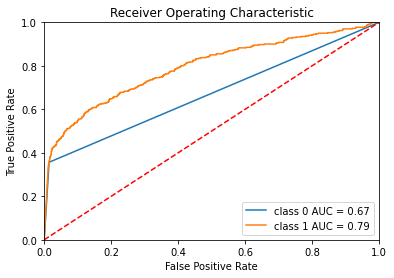

In [451]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'class 0 AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, label = 'class 1 AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# simple Gboost --KNN

In [33]:
def boost(datatrain,datavali, nestimator=100, learningrate=1.0, maxdepth=1, randomstate=0):
    '''
    if not specified, the parameters are nestimator=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    import numpy as np
    from xgboost.sklearn import XGBClassifier
    datatraindummy=pd.get_dummies(datatrain)
    datatrainX=np.array(datatraindummy.drop('Default_ind', axis=1))
    datatrainy=datatraindummy['Default_ind']
    
    XGB=XGBClassifier(n_estimators=nestimator, learning_rate=learningrate, max_depth=maxdepth, random_state=randomstate)
    
    '''RFclass = RandomForestClassifier(n_estimators=nestimator, criterion=criter,
                                     max_depth=mdepth, min_samples_split=misamples_split, 
                                     min_samples_leaf=misamples_leaf, bootstrap=bootstra,
                                     oob_score=oobscore, warm_start=warmstart,
                                     max_samples=maxsamples, random_state=randomstate)
    ''' 
    modelRF=XGB.fit(datatrainX,datatrainy)
    
    return(modelRF,datatrainX,datatrainy)

In [34]:
clf6,x6,y6=boost(df1_up,df1_vali_up)

In [250]:
clf6.fit(x6,y6)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'adam']},
             scoring='accuracy')

In [252]:
clf6.scores(x6,y6)

0.6856781278822848

In [268]:
df6_test1=Cate_to_object_excp_inq(df1_test)
df6_test1=pd.get_dummies(df6_test1)
clf6.score(df6_test1.drop('Default_ind',axis=1),df6_test1['Default_ind'])

0.7738

In [269]:
y_pred6=clf6.predict(df6_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df6_test1['Default_ind'],y_pred6)

array([[3629,  970],
       [ 161,  240]])

In [62]:
def best_xgboost(datatrain, datavali, criteria='accuracy', randomstate=0):
    '''
    if not specified, the parameters are n_estimators=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    from xgboost.sklearn import XGBClassifier
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    
    XGB=XGBClassifier()
    from sklearn.model_selection import GridSearchCV
    parameter_space = {
        'loss':['deviance', 'exponential'],
        'n_estimators': [100,300],
        'subsample': [0.5, 1],
        'criterion':['friedman_mse', 'mse'], 
        'max_depth':range(3,10,2),
    }
    modelGS=GridSearchCV(XGB, parameter_space,cv=pds,scoring=criteria)
    modelGS.fit(datatrainX, datatrainy)
    return modelGS,datatrainX,datatrainy

In [64]:
def best_xgboost(datatrain, datavali, criteria='accuracy', randomstate=0):
    '''
    if not specified, the parameters are n_estimators=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    from sklearn.ensemble import GradientBoostingClassifier
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    
    XGB=GradientBoostingClassifier()
    from sklearn.model_selection import GridSearchCV
    parameter_space = {
        'loss':['deviance', 'exponential'],
    }
    modelGS=GridSearchCV(XGB, parameter_space,cv=pds,scoring=criteria)
    modelGS.fit(datatrainX, datatrainy)
    return modelGS,datatrainX,datatrainy

In [65]:
clf7,x7,y7=best_xgboost(df1_up,df1_vali_up)

In [76]:
def best_xgboost(datatrain, datavali, criteria='accuracy', randomstate=0):
    '''
    if not specified, the parameters are n_estimators=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    from sklearn.ensemble import GradientBoostingClassifier
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    
    XGB=GradientBoostingClassifier(loss='exponential')
    from sklearn.model_selection import GridSearchCV
    parameter_space = {
        'n_estimators': [100,300]
        
    }
    modelGS=GridSearchCV(XGB,parameter_space,cv=pds,scoring=criteria)
    modelGS.fit(datatrainX, datatrainy)
    return modelGS,datatrainX,datatrainy


In [77]:
clf7,x7,y7=best_xgboost(df1_up,df1_vali_up)

In [79]:
clf7.best_params_

{'n_estimators': 100}

In [80]:
def best_xgboost(datatrain, datavali, criteria='accuracy', randomstate=0):
    '''
    if not specified, the parameters are n_estimators=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    from sklearn.ensemble import GradientBoostingClassifier
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    
    XGB=GradientBoostingClassifier(loss='exponential')
    from sklearn.model_selection import GridSearchCV
    parameter_space = {
        'n_estimators': range(50,100,10),
    }
    modelGS=GridSearchCV(XGB, parameter_space,cv=pds,scoring=criteria)
    modelGS.fit(datatrainX, datatrainy)
    return modelGS,datatrainX,datatrainy

In [81]:
clf7,x7,y7=best_xgboost(df1_up,df1_vali_up)

In [82]:
clf7.best_params_

{'n_estimators': 90}

In [91]:
def best_xgboost(datatrain, datavali, criteria='accuracy', randomstate=0):
    '''
    if not specified, the parameters are n_estimators=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    from sklearn.ensemble import GradientBoostingClassifier
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    
    XGB=GradientBoostingClassifier(loss='exponential',n_estimators=90)
    from sklearn.model_selection import GridSearchCV
    parameter_space = {
        'subsample':[0.5,1]
    }
    modelGS=GridSearchCV(XGB, parameter_space,cv=pds,scoring=criteria)
    modelGS.fit(datatrainX, datatrainy)
    return modelGS,datatrainX,datatrainy

In [92]:
clf7,x7,y7=best_xgboost(df1_up,df1_vali_up)

In [94]:
clf7.best_params_

{'subsample': 1}

In [97]:
def best_xgboost(datatrain, datavali, criteria='accuracy', randomstate=0):
    '''
    if not specified, the parameters are n_estimators=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    from sklearn.ensemble import GradientBoostingClassifier
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    
    XGB=GradientBoostingClassifier(loss='exponential',n_estimators=90,subsample=1)
    from sklearn.model_selection import GridSearchCV
    parameter_space = {
        'criterion':['friedman_mse', 'mse']
    }
    modelGS=GridSearchCV(XGB, parameter_space,cv=pds,scoring=criteria)
    modelGS.fit(datatrainX, datatrainy)
    return modelGS,datatrainX,datatrainy

In [98]:
clf7,x7,y7=best_xgboost(df1_up,df1_vali_up)

In [99]:
clf7.best_params_

{'criterion': 'friedman_mse'}

In [103]:
def best_xgboost(datatrain, datavali, criteria='accuracy', randomstate=0):
    '''
    if not specified, the parameters are n_estimators=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    from sklearn.ensemble import GradientBoostingClassifier
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    
    XGB=GradientBoostingClassifier(loss='exponential',n_estimators=90,subsample=1,criterion='friedman_mse')
    from sklearn.model_selection import GridSearchCV
    parameter_space = {'max_depth':range(1,7,2)
        
    }
    modelGS=GridSearchCV(XGB, parameter_space,cv=pds,scoring=criteria)
    modelGS.fit(datatrainX, datatrainy)
    return modelGS,datatrainX,datatrainy

In [104]:
clf7,x7,y7=best_xgboost(df1_up,df1_vali_up)

In [105]:
clf7.best_params_

{'max_depth': 3}

In [106]:
def best_xgboost(datatrain, datavali, criteria='accuracy', randomstate=0):
    '''
    if not specified, the parameters are n_estimators=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    from sklearn.ensemble import GradientBoostingClassifier
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    
    XGB=GradientBoostingClassifier(loss='exponential',subsample=1,criterion='friedman_mse')
    from sklearn.model_selection import GridSearchCV
    parameter_space = {'max_depth':range(1,7,2),
                        'n_estimators':range(80,100,5)
    }
    modelGS=GridSearchCV(XGB, parameter_space,cv=pds,scoring=criteria)
    modelGS.fit(datatrainX, datatrainy)
    return modelGS,datatrainX,datatrainy

In [107]:
clf7,x7,y7=best_xgboost(df1_up,df1_vali_up)

In [365]:
from sklearn.ensemble import GradientBoostingClassifier
xg1 = GradientBoostingClassifier(loss='exponential',subsample=1,criterion='friedman_mse',max_depth=3,n_estimators=90)
xg1.fit(x7,y7)
xg1.score(df7_test1.drop('Default_ind',axis=1),df7_test1['Default_ind'])

0.7994

In [108]:
clf7.best_params_

{'max_depth': 3, 'n_estimators': 90}

In [266]:
df7_test1=Cate_to_object_excp_inq(df1_test)
df7_test1=pd.get_dummies(df7_test1)

0.8978

In [366]:
y_pred7=xg1.predict(df7_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df7_test1['Default_ind'],y_pred7)

array([[3675,  924],
       [  79,  322]])

# simple Gboost --drop

In [182]:
def best_xgboost(datatrain, datavali, criteria='accuracy', randomstate=0):
    '''
    if not specified, the parameters are n_estimators=100, criterion="gini", max_depth=8, min_samples_split=400, 
    min_samples_leaf=50, bootstrap=True, oob_score=False, warm_start=False, max_samples=3000, random_state=0
    '''
    from sklearn.model_selection import PredefinedSplit
    import numpy as np
    from sklearn.ensemble import GradientBoostingClassifier
    frames=pd.concat([datatrain, datavali])
    frames_reind=frames.set_index([pd.Index(range(len(frames)))])
    split_index=[-1]*len(datatrain)+[0]*len(datavali)
    pds = PredefinedSplit(test_fold = split_index)
    datadummy=pd.get_dummies(frames_reind)
    datatrainX=np.array(datadummy.drop('Default_ind', axis=1))
    datatrainy=datadummy['Default_ind']
    
    XGB=GradientBoostingClassifier(loss='exponential',subsample=1,criterion='friedman_mse')
    from sklearn.model_selection import GridSearchCV
    parameter_space = {'max_depth':range(1,7,2),
                        'n_estimators':range(80,100,5)
    }
    modelGS=GridSearchCV(XGB, parameter_space,cv=pds,scoring=criteria)
    modelGS.fit(datatrainX, datatrainy)
    return modelGS,datatrainX,datatrainy

In [183]:
clf8,x8,y8=best_xgboost(df3_up,df3_vali_up)

In [367]:
clf8.best_params_

{'max_depth': 5, 'n_estimators': 95}

In [369]:
from sklearn.ensemble import GradientBoostingClassifier
xg2 = GradientBoostingClassifier(loss='exponential',subsample=1,criterion='friedman_mse',max_depth=5,n_estimators=95)
xg2.fit(x8,y8)
xg2.score(df3_test1.drop('Default_ind',axis=1),df3_test1['Default_ind'])

0.8313659359190556

In [370]:
y_pred8=xg2.predict(df3_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df3_test1['Default_ind'],y_pred8)

array([[3205,  605],
       [  95,  246]])

# simple GBoost -CART

In [188]:
clf9,x9,y9=best_xgboost(df5_up,df5_vali_up)

In [271]:
clf9.best_params_

{'max_depth': 3, 'n_estimators': 95}

In [272]:
from sklearn.ensemble import GradientBoostingClassifier
clf9_up=GradientBoostingClassifier(max_depth=3,n_estimators=95)

In [273]:
clf9_up.fit(x9,y9)

GradientBoostingClassifier(n_estimators=95)

In [277]:

clf9_up.score(df5_test1.drop('Default_ind',axis=1),df5_test1['Default_ind'])

0.797

In [278]:
y_pred9=clf9_up.predict(df5_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df5_test1['Default_ind'],y_pred9)

array([[3668,  931],
       [  84,  317]])

# simple GBoost -RF

In [192]:
clf10,x10,y10=best_xgboost(df6_up,df6_vali_up)

In [279]:
clf10.best_params_

{'max_depth': 3, 'n_estimators': 95}

In [280]:
from sklearn.ensemble import GradientBoostingClassifier
clf10_up=GradientBoostingClassifier(max_depth=3,n_estimators=95)

In [282]:
clf10_up.fit(x10,y10)

GradientBoostingClassifier(n_estimators=95)

In [283]:
clf10_up.score(df6_test1.drop('Default_ind',axis=1),df6_test1['Default_ind'])

0.7976

In [284]:
y_pred10=clf10_up.predict(df6_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df6_test1['Default_ind'],y_pred10)

array([[3666,  933],
       [  79,  322]])

# simple GBoost --EMB 

In [196]:
clf11,x11,y11=best_xgboost(df7_up,df7_vali_up)

In [245]:
clf11.fit(x11, y11)
confusion_matrix(y11,clf11.predict(x11))

array([[17116,  4076],
       [ 4638, 20791]])

In [371]:
clf11.best_params_

{'max_depth': 3, 'n_estimators': 95}

In [372]:
from sklearn.ensemble import GradientBoostingClassifier
xg4 = GradientBoostingClassifier(loss='exponential',subsample=1,criterion='friedman_mse',max_depth=3,n_estimators=90)
xg4.fit(x11,y11)
xg4.score(df7_test1.drop('Default_ind',axis=1),df7_test1['Default_ind'])

0.7994

In [373]:
y_pred11=xg4.predict(df7_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df7_test1['Default_ind'],y_pred11)

array([[3675,  924],
       [  79,  322]])

# simple GBoost -- Median

In [214]:
clf12,x12,y12=best_xgboost(df2_up,df2_vali_up)

In [244]:
clf11.fit(x11, y11)
confusion_matrix(y12,clf12.predict(x12))

array([[17087,  4105],
       [ 4654, 20775]])

In [375]:
clf12.best_params_

{'max_depth': 3, 'n_estimators': 80}

In [376]:
from sklearn.ensemble import GradientBoostingClassifier
xg5 = GradientBoostingClassifier(loss='exponential',subsample=1,criterion='friedman_mse',max_depth=3,n_estimators=80)
xg5.fit(x11,y11)
xg5.score(df2_test1.drop('Default_ind',axis=1),df2_test1['Default_ind'])

0.8008

In [377]:
y_pred12=xg5.predict(df2_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df2_test1['Default_ind'],y_pred12)

array([[3681,  918],
       [  78,  323]])

# simple GBoost -- mean

In [236]:
clf13,x13,y13=best_xgboost(dfn_up,dfn_vali_up)

In [285]:
clf13.best_params_


{'max_depth': 1, 'n_estimators': 95}

In [286]:
from sklearn.ensemble import GradientBoostingClassifier
clf13_up=GradientBoostingClassifier(max_depth=1,n_estimators=95)

In [287]:
clf13_up.fit(x13,y13)

GradientBoostingClassifier(max_depth=1, n_estimators=95)

In [288]:
clf13_up.score(dfn_test1.drop('Default_ind',axis=1),dfn_test1['Default_ind'])

0.8138

In [378]:
y_pred13=clf13_up.predict(dfn_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(dfn_test1['Default_ind'],y_pred13)

array([[3746,  853],
       [  78,  323]])

In [402]:
pd.DataFrame(clf3.predict_proba(dfn_test1.drop('Default_ind',axis=1))).to_csv('probility.csv')

# simple GBoost -- EM

In [379]:
clf14,x14,y14=best_xgboost(df4_up,df4_vali_up)

In [380]:
clf14.best_params_

{'max_depth': 5, 'n_estimators': 95}

In [381]:
from sklearn.ensemble import GradientBoostingClassifier
clf14_up=GradientBoostingClassifier(loss='exponential',subsample=1,criterion='friedman_mse',max_depth=5,n_estimators=95)

In [382]:
clf14_up.fit(x14,y14)
clf14_up.score(df4_test1.drop('Default_ind',axis=1),df4_test1['Default_ind'])

0.8274

In [383]:
y_pred14=clf14_up.predict(df4_test1.drop('Default_ind',axis=1))
from sklearn.metrics import confusion_matrix
confusion_matrix(df4_test1['Default_ind'],y_pred14)

array([[3838,  761],
       [ 102,  299]])